<a href="https://colab.research.google.com/github/ygeszvain/projects/blob/master/Marvel_Reviews_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import numpy as np 
import pandas as pd 
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
#from pyvttbl import DataFrame # Anova
from scipy import stats
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

import timeit
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

In [0]:
!pip install kaggle
!pip install rfpimp
!pip install eli5
!pip install fbprophet

In [0]:
df = pd.read_csv('BudgetAndResults.csv')
df.head()

,FullMovieName,Month,Day,Year,Budget,Domestic Gross,Worldwide Gross,Universe,Movie
0,Avengers: Age of Ultron,May,1,2015,495000000,459005868,1405403694,MCU,AgeofUltron
1,Ant-man,June,29,2015,160000000,180202163,519311965,MCU,Antman
2,Aquaman,Dec,21,2018,180000000,335061807,1147761807,MCU,Antman
3,Ant-man and the wasp,July,6,2018,162000000,216648740,622674139,MCU,Antmanthewasp
4,Avengers Endgame,Apr,26,2019,365000000,827811359,2734786099,MCU,AvengersEndgame


In [0]:
df_polarity = pd.read_csv('rotten_reviews_Polarity.csv')
df_polarity.head()

,Unnamed: 0,Movie,FileName,Field_1,text,polarity
0,0,AgeofUltron,AgeofUltron_rm,0,"Fans of the franchise will be pleased, but tho...",0.238
1,1,AgeofUltron,AgeofUltron_rm,1,"""Avengers: Age of Ultron"" is a sometimes daffy...",0.881
2,2,AgeofUltron,AgeofUltron_rm,2,"More does not necessarily equal better; here, ...",-0.403
3,3,AgeofUltron,AgeofUltron_rm,3,"The sharp, interpersonal dramedy that made the...",-0.166
4,4,AgeofUltron,AgeofUltron_rm,4,"For the most part, ""Avengers: Age of Ultron"" i...",0.000


In [0]:
df_polarity_mean = df_polarity.groupby(['Movie'])['polarity'].mean()

In [0]:
df['polarity'] = df['Movie'].map(df_polarity_mean)

In [0]:
df.head()

,FullMovieName,Month,Day,Year,Budget,Domestic Gross,Worldwide Gross,Universe,Movie,polarity
0,Avengers: Age of Ultron,May,1,2015,495000000,459005868,1405403694,MCU,AgeofUltron,0.326
1,Ant-man,June,29,2015,160000000,180202163,519311965,MCU,Antman,0.448
2,Aquaman,Dec,21,2018,180000000,335061807,1147761807,MCU,Antman,0.448
3,Ant-man and the wasp,July,6,2018,162000000,216648740,622674139,MCU,Antmanthewasp,0.484
4,Avengers Endgame,Apr,26,2019,365000000,827811359,2734786099,MCU,AvengersEndgame,0.464


In [0]:
df = df.rename(index=str, columns={"Domestic Gross": "Domestic_Gross", "Worldwide Gross": "Worldwide_Gross"})

In [0]:
df.describe()

,Day,Year,Budget,Domestic_Gross,Worldwide_Gross,polarity
count,21.000,21.000,21.000,21.000,21.000,21.000
mean,12.381,2016.762,234190476.190,409094077.095,1049986883.048,0.333
std,9.341,1.375,95493779.403,212856305.549,594843910.399,0.165
min,1.000,2014.000,100000000.000,139630393.000,363030393.000,-0.120
25%,5.000,2016.000,170000000.000,232641920.000,677541920.000,0.268
50%,10.000,2017.000,200000000.000,334201140.000,868160194.000,0.380
75%,18.000,2018.000,300000000.000,530851601.000,1153304495.000,0.461
max,29.000,2019.000,495000000.000,936662225.000,2734786099.000,0.503


In [0]:
(df.isnull().sum() / len(df)).sort_values(ascending=False)[:20]

polarity          0.000
Movie             0.000
Universe          0.000
Worldwide_Gross   0.000
Domestic_Gross    0.000
Budget            0.000
Year              0.000
Day               0.000
Month             0.000
FullMovieName     0.000
dtype: float64

In [0]:
df.drop(['Movie'], axis=1, inplace=True)

In [0]:
df.FullMovieName.unique()

array(['Avengers: Age of Ultron', 'Ant-man', 'Aquaman',
       'Ant-man and the wasp', 'Avengers Endgame', 'Avengers InfinityWar',
       'Black Panther', 'Captain America: Civil War',
       'Batman v Superman: Dawn of Justice', 'Doctor Strange',
       'Guardians of the Galaxy', 'Justice League', 'Rogue One', 'Shazam',
       'Solo', 'Spider-Man: Homecoming', 'Suicide Squad',
       'Star Wars Ep. VII: The Force Awakens', 'The Last Jedi',
       'Thor Ragnarok', 'Wonder Woman'], dtype=object)

In [0]:
# Label encoding

lb_make = LabelEncoder()
df["Month_code"] = lb_make.fit_transform(df["Month"].astype(str))
df["Universe_code"] = lb_make.fit_transform(df["Universe"].astype(str))


 mu = 1049986883.05 and sigma = 580508215.55



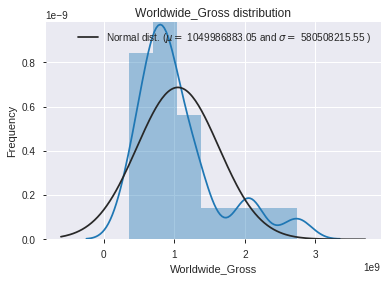

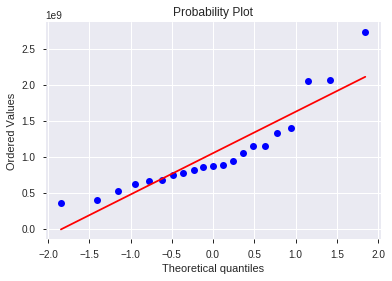

In [0]:
sns.distplot(df['Worldwide_Gross'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Worldwide_Gross'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Worldwide_Gross distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Worldwide_Gross'], plot=plt)
plt.show();


 mu = 20.64 and sigma = 0.50



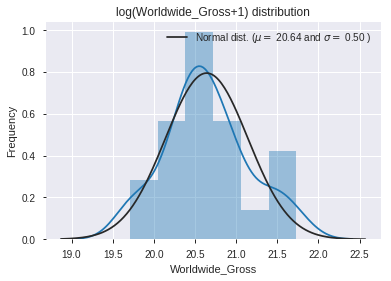

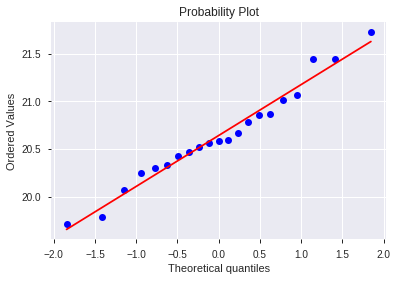

In [0]:
sns.distplot(np.log1p(df['Worldwide_Gross']) , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(df['Worldwide_Gross']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log(Worldwide_Gross+1) distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(df['Worldwide_Gross']), plot=plt)
plt.show();

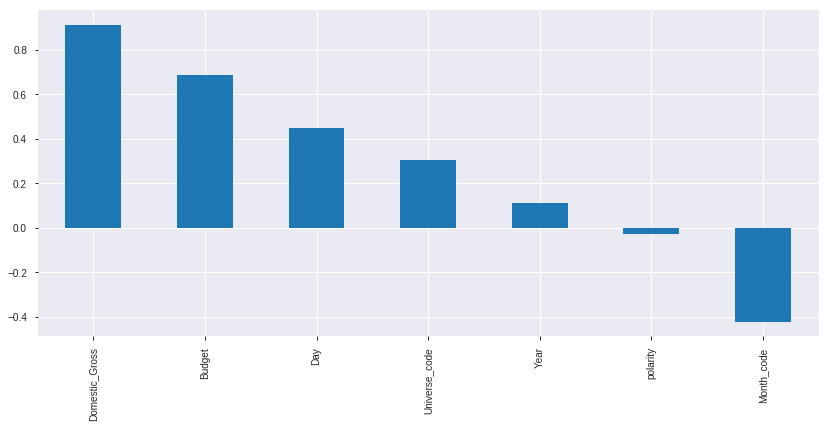

In [0]:
corr_with_sale_price = df.corr()["Worldwide_Gross"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_sale_price.drop("Worldwide_Gross").plot.bar()
plt.show();

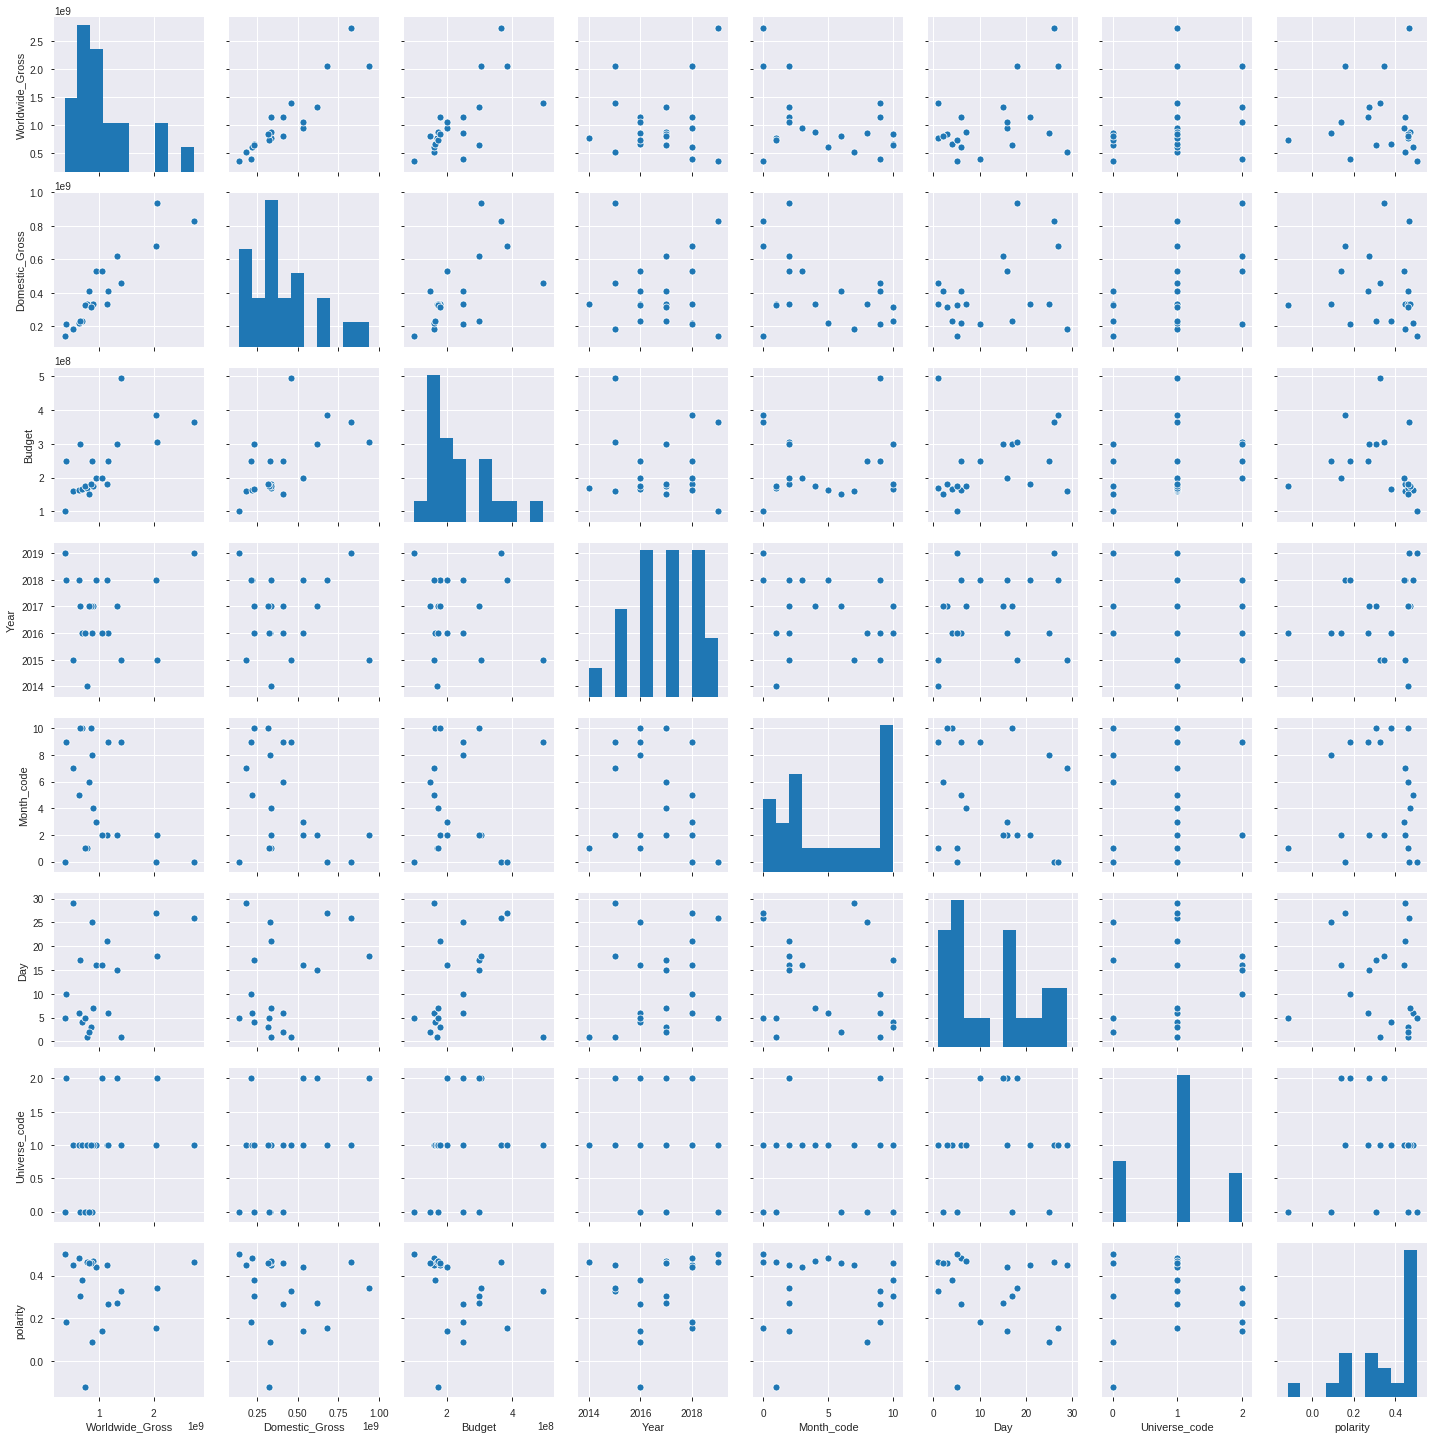

In [0]:
sns.pairplot(df[['Worldwide_Gross', 'Domestic_Gross', 'Budget', 'Year', 'Month_code','Day', 'Universe_code','polarity']])
plt.show();

In [0]:
df["Worldwide_Gross"] = np.log1p(df["Worldwide_Gross"])

#log transform skewed numeric features:
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df[skewed_feats] = np.log1p(df[skewed_feats])

In [0]:
df = pd.get_dummies(df)
df = df.fillna(df.mean())

In [0]:
X, y = df.drop(['Worldwide_Gross'], axis = 1), df['Worldwide_Gross']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)

[00:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_train_pred1 = xgb_model1.predict(X_train)
y_pred1 = xgb_model1.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
test_mse1 = mean_squared_error(y_pred1, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

Train r2 score:  0.9991287395050714
Test r2 score:  0.3187202708377548
Train RMSE: 0.0140
Test RMSE: 0.2636


In [0]:
xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train)
y_pred2 = xgb_model2.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train)
test_mse2 = mean_squared_error(y_pred2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)

[00:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.5860806403389205
Test r2 score:  0.7102537174324134
Train RMSE: 0.2377
Test RMSE: 0.1719


In [0]:
xgb_model3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model3.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred3 = xgb_model3.predict(X_train)
y_pred3 = xgb_model3.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred3, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred3))
train_mse3 = mean_squared_error(y_train_pred3, y_train)
test_mse3 = mean_squared_error(y_pred3, y_test)
train_rmse3 = np.sqrt(train_mse3)
test_rmse3 = np.sqrt(test_mse3)
print('Train RMSE: %.4f' % train_rmse3)
print('Test RMSE: %.4f' % test_rmse3)

[00:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.7054728079256893
Test r2 score:  0.7185606885672728
Train RMSE: 0.2079
Test RMSE: 0.1695


In [0]:
from collections import OrderedDict
OrderedDict(sorted(xgb_model1.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('Domestic_Gross', 58),
             ('Year', 43),
             ('Budget', 26),
             ('FullMovieName_Captain America: Civil War', 23),
             ('Day', 21),
             ('polarity', 13),
             ('FullMovieName_Black Panther', 13),
             ('FullMovieName_Thor Ragnarok', 6),
             ('Month_code', 5),
             ('Month_Aug', 1)])

In [0]:
most_relevant_features= list( dict((k, v) for k, v in xgb_model1.get_booster().get_fscore().items() if v >= 4).keys())
print(most_relevant_features)

['Domestic_Gross', 'Budget', 'Day', 'Month_code', 'polarity', 'FullMovieName_Black Panther', 'Year', 'FullMovieName_Captain America: Civil War', 'FullMovieName_Thor Ragnarok']


In [0]:
# create training and test datasets
np.random.seed(1234)
df['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(df))
df_train = df[df['runiform'] >= 0.33]
df_test = df[df['runiform'] < 0.33]

In [0]:
# check training data frame
print('\SusItems_train data frame (rows, columns): ',df_train.shape)
print(df_train.head())

\SusItems_train data frame (rows, columns):  (17, 44)
   Day  Year  Budget  ...  Universe_MCU  Universe_STAR  runiform
1   29  2015  18.891  ...             1              0     0.622
2   21  2018  19.008  ...             1              0     0.438
3    6  2018  18.903  ...             1              0     0.785
4   26  2019  19.715  ...             1              0     0.780
7    6  2016  19.337  ...             1              0     0.802

[5 rows x 44 columns]


In [0]:
# check test data frame
print('\SusItems_test data frame (rows, columns): ',df_test.shape)
print(df_test.head())

\SusItems_test data frame (rows, columns):  (4, 44)
    Day  Year  Budget  ...  Universe_MCU  Universe_STAR  runiform
0     1  2015  20.020  ...             1              0     0.192
5    27  2018  19.769  ...             1              0     0.273
6    16  2018  19.114  ...             1              0     0.276
17   18  2015  19.539  ...             0              1     0.014

[4 rows x 44 columns]


In [0]:
import statsmodels.formula.api as smf
# include conference_code as a classifier
model2 = smf.mixedlm("Worldwide_Gross ~ Month_code + Day + Budget + Domestic_Gross + polarity", df_train, groups=df_train["Universe_code"])

model2f = model2.fit()

print(model2f.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Worldwide_Gross
No. Observations: 17      Method:             REML           
No. Groups:       3       Scale:              0.0105         
Min. group size:  3       Likelihood:         -0.5873        
Max. group size:  9       Converged:          Yes            
Mean group size:  5.7                                        
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          -0.548    2.019 -0.271 0.786 -4.505  3.409
Month_code         -0.006    0.009 -0.696 0.486 -0.024  0.011
Day                 0.006    0.003  1.883 0.060 -0.000  0.013
Budget              0.166    0.150  1.108 0.268 -0.128  0.460
Domestic_Gross      0.907    0.094  9.663 0.000  0.723  1.091
polarity            0.103    0.192  0.536 0.592 -0.274  0.480
Group Var           

**Worldwide_Gross = -0.548 - 0.006 * Month_code + 0.006 * Day + 00.166* Budget + 0.907 * Domestic_Gross + 0.103 * polarity**